## Importing data

In [100]:
import pandas as pd 
import mplfinance as mf
import datetime
import talib as ta
import pandas_ta as pt
import warnings
import seaborn as sns
import numpy as np 
warnings.filterwarnings("ignore")
import json
from scipy.stats import linregress
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
#marpe = pd.read_excel("tm1_mar23_pe.xlsx") 
may3 =  pd.read_excel("tm3_may23.xlsx")
dec = pd.read_excel("tm1_dec22.xlsx")  
jan = pd.read_excel("tm1_jan23.xlsx") 
feb = pd.read_excel("tm1_feb23.xlsx")  
mar = pd.read_excel("tm1_mar23.xlsx") 
apr = pd.read_excel("tm1_apr23.xlsx")
may = pd.read_excel("tm1_may23.xlsx")

list = [dec,jan,feb]
df = pd.concat(list, axis=0)

list2 = [mar,apr,may]
df2 = pd.concat(list2, axis=0)

all = [dec,jan,feb,mar,apr,may]
df_all = pd.concat(all, axis=0)

sample1 = mar 
sample1.head(3)

,datetime,close_n,date_n,high_n,low_n,oi_n,open_n,symbol_n,time_n,volume_n,close_o,date_o,high_o,low_o,oi_o,open_o,symbol_o,time_o,volume_o
0,2023-03-01 09:15:00,17369.60,2023-03-01,17371.15,17345.25,NaN,17360.1,NIFTY,09:15:00,0,53.00,2023-03-01,54.00,41.05,12297350,52.25,NIFTY02MAR2317400CE,09:15:00,3972703
1,2023-03-01 09:16:00,17380.85,2023-03-01,17383.70,17364.30,NaN,17369.0,NIFTY,09:16:00,0,58.85,2023-03-01,58.85,50.85,12297350,52.85,NIFTY02MAR2317400CE,09:16:00,4224400
2,2023-03-01 09:17:00,17378.90,2023-03-01,17387.35,17371.95,NaN,17381.5,NIFTY,09:17:00,0,58.10,2023-03-01,61.00,55.40,11160800,58.90,NIFTY02MAR2317400CE,09:17:00,4003350


In [102]:
# Assuming 'date_n' is a DateTime column in your DataFrame
sample1['datetime'] = pd.to_datetime(sample1['datetime'])

In [103]:
sample1.set_index('datetime', inplace=True)

sample1 = sample1.resample('2T').agg({
    'date_n':'first',
    'time_n': 'first',
    'open_n': 'first',
    'high_n': 'max',
    'low_n': 'min',
    'close_n': 'last',
    'open_o': 'first',
    'high_o': 'max',
    'low_o': 'min',
    'close_o': 'last',
    'oi_o': 'last'})

# Drop rows with NaN values
sample1.dropna(inplace=True)

In [104]:
sample1.head()

,date_n,time_n,open_n,high_n,low_n,close_n,open_o,high_o,low_o,close_o,oi_o
datetime,,,,,,,,,,,
2023-03-01 09:14:00,2023-03-01,09:15:00,17360.10,17371.15,17345.25,17369.60,52.25,54.00,41.05,53.00,12297350.0
2023-03-01 09:16:00,2023-03-01,09:16:00,17369.00,17387.35,17364.30,17378.90,52.85,61.00,50.85,58.10,11160800.0
2023-03-01 09:18:00,2023-03-01,09:18:00,17378.55,17393.25,17377.20,17387.15,57.70,62.95,57.40,61.80,11160800.0
2023-03-01 09:20:00,2023-03-01,09:20:00,17387.95,17410.30,17387.95,17408.00,62.50,70.00,62.50,69.85,10753550.0
2023-03-01 09:22:00,2023-03-01,09:22:00,17407.70,17407.70,17381.10,17387.50,70.75,70.75,58.70,61.00,10791250.0


In [105]:
sample1.reset_index(inplace = True)

# Creating overview indicators

### Market profile indicator

In [106]:
import pandas as pd
import numpy as np

# Load your 1-minute Nifty index OHLC data into a DataFrame
# Replace 'your_data.csv' with your data file or use an appropriate data source.

# Convert the timestamp column to a datetime format (if not already)
sample1['datetime'] = pd.to_datetime(sample1['datetime'])

# Group the data by each trading day
daily_data = sample1.groupby(sample1['datetime'].dt.date)

# Initialize lists to store the results for each day
data_list = []

# Iterate through each trading day and calculate the Value Area
for day, day_data in daily_data:
    close_prices = day_data['close_n']

    # Calculate the 70th percentile for Value Area High
    value_area_high = np.percentile(close_prices, 70)

    # Calculate the 30th percentile for Value Area Low
    value_area_low = np.percentile(close_prices, 30)

    # Append the results for the current day to the list
    data_list.append((day, value_area_high, value_area_low))

# Create a DataFrame from the list of results
va_data = pd.DataFrame(data_list, columns=['date_n', 'vah', 'val'])

va_data['va_width'] = va_data['vah'] - va_data['val']

va_data['vah_1'] = va_data['vah'].shift()
va_data['val_1'] = va_data['val'].shift()
va_data['va_width_1'] = va_data['vah_1'] - va_data['val_1']
va_data['va_width_avg'] = va_data['va_width_1'].rolling(window = 30).mean()

va_data['vah_2'] = va_data['vah_1'].shift()
va_data['val_2'] = va_data['val_1'].shift()
va_data['va_width_2'] = va_data['vah_2'] - va_data['val_2']

va_data['vah_3'] = va_data['vah_2'].shift()
va_data['val_3'] = va_data['val_2'].shift()
va_data['va_width_3'] = va_data['vah_3'] - va_data['val_3']

va_data.head()

,date_n,vah,val,va_width,vah_1,val_1,va_width_1,va_width_avg,vah_2,val_2,va_width_2,vah_3,val_3,va_width_3
0,2023-03-01,17429.915,17413.435,16.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-02,17376.990,17337.815,39.175,17429.915,17413.435,16.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-03,17588.555,17543.625,44.930,17376.990,17337.815,39.175,NaN,17429.915,17413.435,16.480,NaN,NaN,NaN
3,2023-03-06,17771.260,17740.325,30.935,17588.555,17543.625,44.930,NaN,17376.990,17337.815,39.175,17429.915,17413.435,16.480
4,2023-03-08,17699.650,17673.005,26.645,17771.260,17740.325,30.935,NaN,17588.555,17543.625,44.930,17376.990,17337.815,39.175


In [107]:
sample1['date_n'] = pd.to_datetime(sample1['date_n'])
va_data['date_n'] = pd.to_datetime(va_data['date_n'])
merged_df = pd.merge(sample1, va_data, on='date_n', how='inner')
merged_df.tail()

,datetime,date_n,time_n,open_n,high_n,low_n,close_n,open_o,high_o,low_o,...,vah_1,val_1,va_width_1,va_width_avg,vah_2,val_2,va_width_2,vah_3,val_3,va_width_3
3567,2023-03-29 15:20:00,2023-03-29,15:20:00,17100.20,17109.05,17097.40,17107.20,138.55,138.55,134.75,...,16970.5,16950.185,20.315,NaN,17035.29,17004.8,30.49,17163.545,17124.11,39.435
3568,2023-03-29 15:22:00,2023-03-29,15:22:00,17107.75,17112.80,17102.55,17111.95,136.85,136.85,132.95,...,16970.5,16950.185,20.315,NaN,17035.29,17004.8,30.49,17163.545,17124.11,39.435
3569,2023-03-29 15:24:00,2023-03-29,15:24:00,17112.05,17116.90,17107.10,17115.35,136.20,136.20,132.70,...,16970.5,16950.185,20.315,NaN,17035.29,17004.8,30.49,17163.545,17124.11,39.435
3570,2023-03-29 15:26:00,2023-03-29,15:26:00,17115.25,17126.15,17111.55,17122.65,134.00,134.15,132.10,...,16970.5,16950.185,20.315,NaN,17035.29,17004.8,30.49,17163.545,17124.11,39.435
3571,2023-03-29 15:28:00,2023-03-29,15:28:00,17123.70,17125.90,17106.35,17115.55,132.80,133.00,131.15,...,16970.5,16950.185,20.315,NaN,17035.29,17004.8,30.49,17163.545,17124.11,39.435


### CPR indicator

In [108]:
import pandas as pd

# Assuming you have a DataFrame named 'sample1'
niftypivots = sample1.copy()

# Convert 'date_n' to a DateTime column
niftypivots['date_n'] = pd.to_datetime(niftypivots['date_n'])

# Set 'date_n' as the index of the DataFrame
niftypivots.set_index('date_n', inplace=True)

# Resample the DataFrame to daily frequency and aggregate the data
niftypivots = niftypivots.resample('D').agg({
    'open_n': 'first',
    'high_n': 'max',
    'low_n': 'min',
    'close_n': 'last'
})

# Drop rows with NaN values
niftypivots.dropna(inplace=True)

new_column_names = {
    'open_n': 'day_open',
    'high_n': 'day_high',
    'low_n': 'day_low',
    'close_n': 'day_close'
}

# Use the rename method to rename the columns
niftypivots.rename(columns=new_column_names, inplace=True)

niftypivots['day_open_1'] = niftypivots['day_open'].shift()
niftypivots['day_high_1'] = niftypivots['day_high'].shift()
niftypivots['day_low_1'] = niftypivots['day_low'].shift()
niftypivots['day_close_1'] = niftypivots['day_close'].shift()

niftypivots['day_range'] = niftypivots['day_high'] -  niftypivots['day_low']
niftypivots['day_range_1'] = niftypivots['day_range'].shift()
niftypivots['day_range_avg'] = niftypivots['day_range_1'].rolling(window=20).mean()

# CPR points calc
niftypivots['pivot_'] = (niftypivots['day_high_1'] + niftypivots['day_low_1'] + niftypivots['day_close_1'])/3
niftypivots['bottom_cpr'] = (niftypivots['day_high_1'] + niftypivots['day_low_1'])/2
niftypivots['top_cpr'] = (niftypivots['pivot_'] -  niftypivots['bottom_cpr']) + niftypivots['pivot_']
niftypivots['cpr_width'] = abs(niftypivots['top_cpr'] - niftypivots['bottom_cpr'])

niftypivots['cpr_width_avg'] = abs(niftypivots['cpr_width']).rolling(window=20).mean()
niftypivots['top_cpr_avg'] = abs(niftypivots['top_cpr']).rolling(window=20).mean()
niftypivots['bottom_cpr_avg'] = abs(niftypivots['bottom_cpr']).rolling(window=20).mean()

# pivot points calc
niftypivots['pp'] = (niftypivots['day_high_1'] + niftypivots['day_low_1'] + niftypivots['day_close_1']) / 3
niftypivots['ps1'] = (2 * niftypivots['pp']) - niftypivots['day_high_1']
niftypivots['ps2'] = niftypivots['pp'] - (niftypivots['day_high_1'] - niftypivots['day_low_1'])
niftypivots['ps3'] = niftypivots['day_low_1'] - 2 * (niftypivots['day_high_1'] - niftypivots['pp'])
niftypivots['pr1'] = (2 * niftypivots['pp']) - niftypivots['day_low_1']
niftypivots['pr2'] = niftypivots['pp'] + (niftypivots['day_high_1'] - niftypivots['day_low_1'])
niftypivots['pr3'] = niftypivots['day_high_1'] + 2 * (niftypivots['pp'] - niftypivots['day_low_1'])


niftypivots.tail()

,day_open,day_high,day_low,day_close,day_open_1,day_high_1,day_low_1,day_close_1,day_range,day_range_1,...,cpr_width_avg,top_cpr_avg,bottom_cpr_avg,pp,ps1,ps2,ps3,pr1,pr2,pr3
date_n,,,,,,,,,,,,,,,,,,,,,
2023-03-22,17177.45,17207.25,17107.85,17142.75,17060.40,17127.70,17016.00,17106.95,99.40,111.70,...,NaN,NaN,NaN,17083.550000,17039.400000,16971.850000,16927.700000,17151.100000,17195.250000,17262.800000
2023-03-23,17097.40,17205.40,17045.30,17068.45,17177.45,17207.25,17107.85,17142.75,160.10,99.40,...,NaN,NaN,NaN,17152.616667,17097.983333,17053.216667,16998.583333,17197.383333,17252.016667,17296.783333
2023-03-27,16984.30,17091.00,16918.55,16963.45,17097.40,17205.40,17045.30,17068.45,172.45,160.10,...,NaN,NaN,NaN,17106.383333,17007.366667,16946.283333,16847.266667,17167.466667,17266.483333,17327.566667
2023-03-28,17031.75,17061.75,16913.75,16956.85,16984.30,17091.00,16918.55,16963.45,148.00,172.45,...,NaN,NaN,NaN,16991.000000,16891.000000,16818.550000,16718.550000,17063.450000,17163.450000,17235.900000
2023-03-29,16977.30,17126.15,16940.60,17115.55,17031.75,17061.75,16913.75,16956.85,185.55,148.00,...,NaN,NaN,NaN,16977.450000,16893.150000,16829.450000,16745.150000,17041.150000,17125.450000,17189.150000


In [109]:
    niftypivots['range_n'] = niftypivots['day_high_1']- niftypivots['day_low_1']

    #Camarilla pivot points 
    niftypivots['h5']= round(((niftypivots['day_high_1']/niftypivots['day_low_1'])*niftypivots['day_close_1']),1)

    niftypivots['h4'] = round((niftypivots['day_close_1'] + ((niftypivots['range_n']*1.1)/2)),1)
    niftypivots['h3'] = round((niftypivots['day_close_1'] + ((niftypivots['range_n']*1.1)/4)),1)
    niftypivots['h2'] = round((niftypivots['day_close_1'] + ((niftypivots['range_n']*1.1)/6)),1)
    niftypivots['h1'] = round((niftypivots['day_close_1'] + ((niftypivots['range_n']*1.1)/12)),1)

    niftypivots['s1'] = round((niftypivots['day_close_1'] - ((niftypivots['range_n']*1.1)/12)),1)
    niftypivots['s2'] = round((niftypivots['day_close_1'] - ((niftypivots['range_n']*1.1)/6)),1)
    niftypivots['s3'] = round((niftypivots['day_close_1'] - ((niftypivots['range_n']*1.1)/4)),1)
    niftypivots['s4'] = round((niftypivots['day_close_1'] - ((niftypivots['range_n']*1.1)/2)),1)

    niftypivots['s5']= round((niftypivots['day_close_1']- (niftypivots['h5']-niftypivots['day_close_1'])),1)

    niftypivots['h5_'] = niftypivots['h5'].shift()
    niftypivots['h4_'] = niftypivots['h4'].shift()
    niftypivots['h3_'] = niftypivots['h3'].shift()
    niftypivots['h2_'] = niftypivots['h2'].shift()
    niftypivots['h1_'] = niftypivots['h1'].shift()
    niftypivots['s1_'] = niftypivots['s1'].shift()
    niftypivots['s2_'] = niftypivots['s2'].shift()
    niftypivots['s3_'] = niftypivots['s3'].shift()
    niftypivots['s4_'] = niftypivots['s4'].shift()
    niftypivots['s5_'] = niftypivots['s5'].shift()

    niftypivots.reset_index(inplace = True)
    niftypivots.drop(columns = ['h5','h4','h4','h3','h2','h1','s5','s4','s4','s3','s2','s1'], inplace = True )
    #niftypivots.rename(columns={'datetime': 'date_n'}, inplace=True)
    niftypivots.head()

,date_n,day_open,day_high,day_low,day_close,day_open_1,day_high_1,day_low_1,day_close_1,day_range,...,h5_,h4_,h3_,h2_,h1_,s1_,s2_,s3_,s4_,s5_
0,2023-03-01,17360.10,17467.75,17345.25,17457.25,NaN,NaN,NaN,NaN,122.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-02,17421.50,17445.80,17306.00,17318.65,17360.10,17467.75,17345.25,17457.25,139.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-03,17451.25,17644.75,17427.70,17592.30,17421.50,17445.80,17306.00,17318.65,217.05,...,17580.5,17524.6,17490.9,17479.7,17468.5,17446.0,17434.8,17423.6,17389.9,17334.0
3,2023-03-06,17680.35,17799.95,17671.95,17719.85,17451.25,17644.75,17427.70,17592.30,128.00,...,17458.6,17395.5,17357.1,17344.3,17331.5,17305.8,17293.0,17280.2,17241.8,17178.7
4,2023-03-08,17665.75,17766.50,17602.25,17751.50,17680.35,17799.95,17671.95,17719.85,164.25,...,17811.4,17711.7,17652.0,17632.1,17612.2,17572.4,17552.5,17532.6,17472.9,17373.2


In [110]:
merged_df['date_n'] = pd.to_datetime(merged_df['date_n'])
#niftypivots['date_n'] = pd.to_datetime(niftypivots['date_n'])
merged_df2 = pd.merge(merged_df, niftypivots, on='date_n', how='inner')

In [111]:
merged_df2.head()

,datetime,date_n,time_n,open_n,high_n,low_n,close_n,open_o,high_o,low_o,...,h5_,h4_,h3_,h2_,h1_,s1_,s2_,s3_,s4_,s5_
0,2023-03-01 09:14:00,2023-03-01,09:15:00,17360.10,17371.15,17345.25,17369.60,52.25,54.00,41.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-01 09:16:00,2023-03-01,09:16:00,17369.00,17387.35,17364.30,17378.90,52.85,61.00,50.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-01 09:18:00,2023-03-01,09:18:00,17378.55,17393.25,17377.20,17387.15,57.70,62.95,57.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-01 09:20:00,2023-03-01,09:20:00,17387.95,17410.30,17387.95,17408.00,62.50,70.00,62.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-01 09:22:00,2023-03-01,09:22:00,17407.70,17407.70,17381.10,17387.50,70.75,70.75,58.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Camarilla levels

In [112]:
merged_df2.columns

Index(['datetime', 'date_n', 'time_n', 'open_n', 'high_n', 'low_n', 'close_n',
       'open_o', 'high_o', 'low_o', 'close_o', 'oi_o', 'vah', 'val',
       'va_width', 'vah_1', 'val_1', 'va_width_1', 'va_width_avg', 'vah_2',
       'val_2', 'va_width_2', 'vah_3', 'val_3', 'va_width_3', 'day_open',
       'day_high', 'day_low', 'day_close', 'day_open_1', 'day_high_1',
       'day_low_1', 'day_close_1', 'day_range', 'day_range_1', 'day_range_avg',
       'pivot_', 'bottom_cpr', 'top_cpr', 'cpr_width', 'cpr_width_avg',
       'top_cpr_avg', 'bottom_cpr_avg', 'pp', 'ps1', 'ps2', 'ps3', 'pr1',
       'pr2', 'pr3', 'range_n', 'h5_', 'h4_', 'h3_', 'h2_', 'h1_', 's1_',
       's2_', 's3_', 's4_', 's5_'],
      dtype='object')

In [113]:
sample1 = merged_df2

### IDENTIFYING FRACTALS

In [114]:
b = 1  # Number of back candles
f = 1  # Number of forward candles
window = b
sample1['fractal'] = 0  # Initialize the 'fractal' column

for i in range(b, len(sample1) - f):  # Adjust the loop range
    if sample1['high_n'][i] >= max(sample1['high_n'][i - b : i + f + 1]):
        sample1['fractal'][i] = 1

    elif sample1['low_n'][i] <= min(sample1['low_n'][i - b : i + f + 1]):
         sample1['fractal'][i] = 2            

In [115]:
sample1.reset_index(inplace = True)

In [116]:

def fractal_correction(i, b, df):
    
    localdf = df[0 : i - b]
    
    fractal_df = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)]

#high correction
    if (i > b+1
        and fractal_df.fractal.values[-1:] == fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 1
        and fractal_df.high_n.values[-1:]  > fractal_df.high_n.values[-2:-1]):

        sample1.at[fractal_df.index[-2:-1], 'fractal'] = 0
        
    elif (i > b+1
        and fractal_df.fractal.values[-1:] == fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 1
        and fractal_df.high_n.values[-1:]  <= fractal_df.high_n.values[-2:-1]):

        sample1.at[fractal_df.index[-1:], 'fractal'] = 0

#low correction

    elif (i > b+1
        and fractal_df.fractal.values[-1:] == fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 2
        and fractal_df.low_n.values[-1:]   < fractal_df.low_n.values[-2:-1]):

        sample1.at[fractal_df.index[-2:-1], 'fractal'] = 0
        
    elif (i > b+1
        and fractal_df.fractal.values[-1:] == fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 2
        and fractal_df.low_n.values[-1:]   >= fractal_df.low_n.values[-2:-1]):

        sample1.at[fractal_df.index[-1:], 'fractal'] = 0

#regular fractals

    elif (i > b+1
        and fractal_df.fractal.values[-1:] != fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 1):

        sample1.at[fractal_df.index[-1:], 'fractal'] = 1  

    elif (i > b+1
        and fractal_df.fractal.values[-1:] != fractal_df.fractal.values[-2:-1] 
        and fractal_df.fractal.values[-1:] == 2):

        sample1.at[fractal_df.index[-1:], 'fractal'] = 2

for i in sample1.index:
    fractal_correction(i, b, sample1)    

In [117]:
def pointpos(x):
    if x['fractal']==2:
        return x['low_n']-1e-3
    elif x['fractal']==1:
        return x['high_n']+1e-3
    else:
        return np.nan

sample1['pointpos'] = sample1.apply(lambda row: pointpos(row), axis=1)

In [118]:
def low_fractals(x):
    if x['fractal']==2:
        return x['low_n']
    else:
        return np.nan

sample1['low_fractals'] = sample1.apply(lambda row: low_fractals(row), axis=1)

In [119]:
def high_fractals(x):
    if x['fractal']==1:
        return x['high_n']
    else:
        return np.nan

sample1['high_fractals'] = sample1.apply(lambda row: high_fractals(row), axis=1)

### SUPPLY AND DEMAND POINTS

In [120]:
    b = 24  # Number of back candles
    f = 24  # Number of forward candles
    window = b
    backcandles = b 
    sample1['supply_demand'] = 0  # Initialize the 'fractal' column

    for i in range(b, len(sample1) - f):  # Adjust the loop range
        if sample1['high_n'][i] >= max(sample1['high_n'][i - b : i + f + 1]):
            sample1['supply_demand'][i] = 1

        elif sample1['low_n'][i] <= min(sample1['low_n'][i - b : i + f + 1]):
             sample1['supply_demand'][i] = 2            

In [121]:

    def supply_demand_correction(i, b, df):
        
        localdf = df[0 : i - b]
        
        fractal_df = localdf[(localdf['supply_demand'] == 1) | (localdf['supply_demand'] == 2)]

    #high correction
        if (i > b+1
            and fractal_df.supply_demand.values[-1:] == fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 1
            and fractal_df.high_n.values[-1:]  > fractal_df.high_n.values[-2:-1]):

            sample1.at[fractal_df.index[-2:-1], 'supply_demand'] = 0
            
        elif (i > b+1
            and fractal_df.supply_demand.values[-1:] == fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 1
            and fractal_df.high_n.values[-1:]  <= fractal_df.high_n.values[-2:-1]):

            sample1.at[fractal_df.index[-1:], 'supply_demand'] = 0

    #low correction

        elif (i > b+1
            and fractal_df.supply_demand.values[-1:] == fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 2
            and fractal_df.low_n.values[-1:]   < fractal_df.low_n.values[-2:-1]):

            sample1.at[fractal_df.index[-2:-1], 'supply_demand'] = 0
            
        elif (i > b+1
            and fractal_df.supply_demand.values[-1:] == fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 2
            and fractal_df.low_n.values[-1:]   >= fractal_df.low_n.values[-2:-1]):

            sample1.at[fractal_df.index[-1:], 'supply_demand'] = 0

    #regular fractals

        elif (i > b+1
            and fractal_df.supply_demand.values[-1:] != fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 1):

            sample1.at[fractal_df.index[-1:], 'supply_demand'] = 1  

        elif (i > b+1
            and fractal_df.supply_demand.values[-1:] != fractal_df.supply_demand.values[-2:-1] 
            and fractal_df.supply_demand.values[-1:] == 2):

            sample1.at[fractal_df.index[-1:], 'supply_demand'] = 2

    for i in sample1.index:
        supply_demand_correction(i, b, sample1)    

In [122]:
def supdempos(x):
    if x['supply_demand']==2:
        return x['low_n']-1e-3
    elif x['supply_demand']==1:
        return x['high_n']+1e-3
    else:
        return np.nan

sample1['supdempos'] = sample1.apply(lambda row: supdempos(row), axis=1)

In [123]:
    def collect_supply_demand(i, backcandles, df):
        # Filter the DataFrame to get the local data
        localdf = df[(i - backcandles):i]
        
        # Create lists of low and high values
        demand = localdf[localdf['supply_demand'] == 2]['low_n'].values.tolist()
        supply = localdf[localdf['supply_demand'] == 1]['high_n'].values.tolist()
        
        # Assign the lists to DataFrame columns
        df.at[i, 'demand'] = demand
        df.at[i, 'supply'] = supply

    # Create empty 'demand' and 'supply' columns in your DataFrame
    sample1['demand'] = None
    sample1['supply'] = None

    for i in sample1.index:
        collect_supply_demand(i, 900, sample1)

### EDA

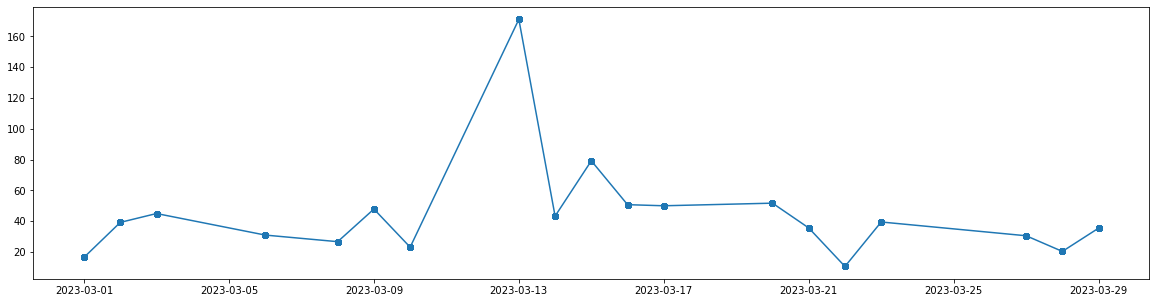

In [124]:
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed
plt.plot(sample1['date_n'], sample1['va_width'], marker='o', linestyle='-')
#plt.plot(sample1['date_n'], sample1['va_width_1'], marker='o', linestyle='-')
plt.show()

In [125]:
va_data.head()

,date_n,vah,val,va_width,vah_1,val_1,va_width_1,va_width_avg,vah_2,val_2,va_width_2,vah_3,val_3,va_width_3
0,2023-03-01,17429.915,17413.435,16.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-02,17376.990,17337.815,39.175,17429.915,17413.435,16.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-03,17588.555,17543.625,44.930,17376.990,17337.815,39.175,NaN,17429.915,17413.435,16.480,NaN,NaN,NaN
3,2023-03-06,17771.260,17740.325,30.935,17588.555,17543.625,44.930,NaN,17376.990,17337.815,39.175,17429.915,17413.435,16.480
4,2023-03-08,17699.650,17673.005,26.645,17771.260,17740.325,30.935,NaN,17588.555,17543.625,44.930,17376.990,17337.815,39.175


In [126]:
niftypivots.head()

,date_n,day_open,day_high,day_low,day_close,day_open_1,day_high_1,day_low_1,day_close_1,day_range,...,h5_,h4_,h3_,h2_,h1_,s1_,s2_,s3_,s4_,s5_
0,2023-03-01,17360.10,17467.75,17345.25,17457.25,NaN,NaN,NaN,NaN,122.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-02,17421.50,17445.80,17306.00,17318.65,17360.10,17467.75,17345.25,17457.25,139.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-03,17451.25,17644.75,17427.70,17592.30,17421.50,17445.80,17306.00,17318.65,217.05,...,17580.5,17524.6,17490.9,17479.7,17468.5,17446.0,17434.8,17423.6,17389.9,17334.0
3,2023-03-06,17680.35,17799.95,17671.95,17719.85,17451.25,17644.75,17427.70,17592.30,128.00,...,17458.6,17395.5,17357.1,17344.3,17331.5,17305.8,17293.0,17280.2,17241.8,17178.7
4,2023-03-08,17665.75,17766.50,17602.25,17751.50,17680.35,17799.95,17671.95,17719.85,164.25,...,17811.4,17711.7,17652.0,17632.1,17612.2,17572.4,17552.5,17532.6,17472.9,17373.2


In [127]:
mp = va_data[['date_n','va_width_1','va_width_2']]
mp.set_index('date_n', inplace = True)
mp.head()

,va_width_1,va_width_2
date_n,,
2023-03-01,NaN,NaN
2023-03-02,16.480,NaN
2023-03-03,39.175,16.480
2023-03-06,44.930,39.175
2023-03-08,30.935,44.930


## Indicators

In [128]:
sample1['sma'] = pt.ema(sample1['close_n'],length = 20)
sample1['sma_10'] = pt.ema(sample1['close_n'],length = 10)

sample1['sma_5_high)'] = pt.ema(sample1['high_n'],length = 5)
sample1['sma_5_low'] = pt.ema(sample1['low_n'],length = 5)
sample1['sma_200'] = pt.ema(sample1['close_n'],length = 200)
sample1['sma_50'] = pt.ema(sample1['close_n'],length = 50)
sample1['sma_100'] = pt.ema(sample1['close_n'],length = 100)

sample1['smaslope_20']= sample1['sma'].diff(periods = 1).rolling(window = 7 ).mean()
sample1['smaslope_50']= sample1['sma_50'].diff(periods = 1).rolling(window = 7 ).mean()
sample1['smaslope_200']= sample1['sma_200'].diff(periods = 1).rolling(window = 7 ).mean()

In [192]:
def calculate_daily_rsi(data):
    return pt.rsi(high=data['high_n'], low=data['low_n'], close=data['close_n'], length=14)

#Calculate ATR partitioned by each day
sample1['rsi_day'] = sample1.groupby('date_n').apply(calculate_daily_rsi).reset_index(level=0, drop=True)

sample1['rsi'] = pt.rsi(sample1['close_n'],length = 14)

In [130]:
#def calculate_daily_atr(data):
   # return pt.atr(high=data['high_n'], low=data['low_n'], close=data['close_n'], length=7)

# Calculate ATR partitioned by each day
#sample1['atr'] = sample1.groupby('date_n').apply(calculate_daily_atr).reset_index(level=0, drop=True)

sample1['atr'] = pt.atr(high=sample1['high_n'], low=sample1['low_n'], close=sample1['close_n'], length=14)

In [175]:
sample1['candle_range']  = sample1['high_n'] - sample1['low_n']
sample1['avg_candle_range'] = sample1['candle_range'].rolling(window = 15).mean()

In [132]:
def calculate_daily_std_high(group):
    return pt.stdev(group['high_n'], length=4)

# Make sure 'date_n' is a datetime column
sample1['date_n'] = pd.to_datetime(sample1['date_n'])

# Group by 'date_n' and apply the calculate_daily_std function
sample1['standard_dev_of_high'] = sample1.groupby('date_n').apply(calculate_daily_std_high).reset_index(level=0, drop=True)

# Resetting the index to align the result with the original DataFrame
sample1 = sample1.reset_index(drop=True)

####################

def calculate_daily_std_low(group):
    return pt.stdev(group['low_n'], length=4)

# Make sure 'date_n' is a datetime column
sample1['date_n'] = pd.to_datetime(sample1['date_n'])

# Group by 'date_n' and apply the calculate_daily_std function
sample1['standard_dev_of_low'] = sample1.groupby('date_n').apply(calculate_daily_std_low).reset_index(level=0, drop=True)

# Resetting the index to align the result with the original DataFrame
sample1 = sample1.reset_index(drop=True)
####################

#sample1['standard_dev_of_close'] =  pt.stdev(sample1['close_n'], length=14)

def calculate_daily_std_close(group):
    return pt.stdev(group['close_n'], length=28)

# Make sure 'date_n' is a datetime column
sample1['date_n'] = pd.to_datetime(sample1['date_n'])

# Group by 'date_n' and apply the calculate_daily_std function
sample1['standard_dev_of_close'] = sample1.groupby('date_n').apply(calculate_daily_std_close).reset_index(level=0, drop=True)

# Resetting the index to align the result with the original DataFrame
sample1 = sample1.reset_index(drop=True)

In [133]:
sample1['candle_range_derivative'] = abs(sample1['candle_range'] - sample1['candle_range'].shift())
#sample1['crd_std'] =  pt.stdev(sample1['candle_range_derivative'], length=14)
#####################

def calculate_daily_std_crd(group):
    return pt.stdev(group['candle_range_derivative'], length=7)

sample1['date_n'] = pd.to_datetime(sample1['date_n'])
sample1['standard_dev_of_crd'] = sample1.groupby('date_n').apply(calculate_daily_std_crd).reset_index(level=0, drop=True)
sample1 = sample1.reset_index(drop=True)

In [134]:
period = 14
stddev = 2
# Calculate Bollinger Bands
sample1.ta.bbands(length=period, std=stddev, append=True)

,BBL_14_2.0,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3567,17003.820980,17064.792857,17125.764734,0.714593,0.847760
3568,17012.478088,17071.617857,17130.757626,0.692843,0.840990
3569,17023.747154,17078.610714,17133.474275,0.642483,0.834824
3570,17039.497539,17086.271429,17133.045318,0.547503,0.888877


In [135]:
sample1.set_index(sample1['datetime'] ,inplace = True)
sample1['RowNumber'] = sample1.groupby(sample1['datetime'].dt.date).cumcount() + 1

sample1['first_candle_high'] = sample1.groupby(sample1.index.date)['high_n'].transform('first')
sample1['first_candle_low'] = sample1.groupby(sample1.index.date)['low_n'].transform('first')
sample1['first_candle_close'] = sample1.groupby(sample1.index.date)['close_n'].transform('first')

sample1['first_low_fractal'] = sample1.groupby(sample1.index.date)['low_fractals'].transform('first')
sample1['first_high_fractals'] = sample1.groupby(sample1.index.date)['high_fractals'].transform('first')

sample1.head()

,index,datetime,date_n,time_n,open_n,high_n,low_n,close_n,open_o,high_o,...,BBM_14_2.0,BBU_14_2.0,BBB_14_2.0,BBP_14_2.0,RowNumber,first_candle_high,first_candle_low,first_candle_close,first_low_fractal,first_high_fractals
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 09:14:00,0,2023-03-01 09:14:00,2023-03-01,09:15:00,17360.10,17371.15,17345.25,17369.60,52.25,54.00,...,NaN,NaN,NaN,NaN,1,17371.15,17345.25,17369.6,17380.95,17410.3
2023-03-01 09:16:00,1,2023-03-01 09:16:00,2023-03-01,09:16:00,17369.00,17387.35,17364.30,17378.90,52.85,61.00,...,NaN,NaN,NaN,NaN,2,17371.15,17345.25,17369.6,17380.95,17410.3
2023-03-01 09:18:00,2,2023-03-01 09:18:00,2023-03-01,09:18:00,17378.55,17393.25,17377.20,17387.15,57.70,62.95,...,NaN,NaN,NaN,NaN,3,17371.15,17345.25,17369.6,17380.95,17410.3
2023-03-01 09:20:00,3,2023-03-01 09:20:00,2023-03-01,09:20:00,17387.95,17410.30,17387.95,17408.00,62.50,70.00,...,NaN,NaN,NaN,NaN,4,17371.15,17345.25,17369.6,17380.95,17410.3
2023-03-01 09:22:00,4,2023-03-01 09:22:00,2023-03-01,09:22:00,17407.70,17407.70,17381.10,17387.50,70.75,70.75,...,NaN,NaN,NaN,NaN,5,17371.15,17345.25,17369.6,17380.95,17410.3


## Creating Algorithm

In [136]:
sample1.columns

Index(['index', 'datetime', 'date_n', 'time_n', 'open_n', 'high_n', 'low_n',
       'close_n', 'open_o', 'high_o', 'low_o', 'close_o', 'oi_o', 'vah', 'val',
       'va_width', 'vah_1', 'val_1', 'va_width_1', 'va_width_avg', 'vah_2',
       'val_2', 'va_width_2', 'vah_3', 'val_3', 'va_width_3', 'day_open',
       'day_high', 'day_low', 'day_close', 'day_open_1', 'day_high_1',
       'day_low_1', 'day_close_1', 'day_range', 'day_range_1', 'day_range_avg',
       'pivot_', 'bottom_cpr', 'top_cpr', 'cpr_width', 'cpr_width_avg',
       'top_cpr_avg', 'bottom_cpr_avg', 'pp', 'ps1', 'ps2', 'ps3', 'pr1',
       'pr2', 'pr3', 'range_n', 'h5_', 'h4_', 'h3_', 'h2_', 'h1_', 's1_',
       's2_', 's3_', 's4_', 's5_', 'fractal', 'pointpos', 'low_fractals',
       'high_fractals', 'supply_demand', 'supdempos', 'demand', 'supply',
       'sma', 'sma_10', 'sma_5_high)', 'sma_5_low', 'sma_200', 'sma_50',
       'sma_100', 'smaslope_20', 'smaslope_50', 'smaslope_200', 'rsi', 'atr',
       'candle_range', 

In [137]:
sample1.drop('datetime', axis=1, inplace=True)
sample1.reset_index(inplace = True)

In [138]:
    #b = 60
    p = 2 # regression points
    window = 1 

    def collect_channel(i,p, window, df):
            
        localdf = df[0: i - window]
        
        lows = localdf[localdf['fractal'] == 2].low_n.values[-p:]
        highs = localdf[localdf['fractal'] == 1].high_n.values[-p:]
        
        if len(lows) == p and len(highs) == p:
            idxhighs = localdf[localdf['fractal'] == 1].high_n.index[-p:]
            idxlows = localdf[localdf['fractal'] == 2].low_n.index[-p:]
            
            sl_highs, interc_highs, _, _, std_err_h = linregress(idxhighs, highs)
            sl_lows, interc_lows, _, _, std_err_l = linregress(idxlows, lows)
            
            return (sl_highs,
                    interc_highs,
                    std_err_h,
                    sl_lows,
                    interc_lows,
                    std_err_l)
        else:
            return (np.nan, np.nan, np.nan, np.nan, np.nan, np.nan)

    sample1['subsignals'] = [collect_channel(i,p,window, sample1) for i in sample1.index]

In [139]:
sample1['std_err_l'] = (sample1['subsignals'].str.get(5))*100
sample1['std_err_l'].describe()

count    3563.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: std_err_l, dtype: float64

In [140]:
sample1['day_range_1'].describe()

count    3384.000000
mean      186.322222
std        73.258129
min        99.400000
25%       128.000000
50%       168.350000
75%       217.050000
max       416.450000
Name: day_range_1, dtype: float64

In [141]:
sample1['std_err_h'] = (sample1['subsignals'].str.get(2))*100
sample1['std_err_h'].describe()

count    3563.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: std_err_h, dtype: float64

In [142]:
def ytc_fractals(row):
    if row['fractal'] == 1:
        return row['high_n']
    elif row['fractal'] == 2:
        return row['low_n']
    else:
        return 0

sample1['ytc_fractals'] = sample1.apply(ytc_fractals, axis=1)

In [143]:
def ytc_channel(i, window, df):
    localdf = df[0: i - window]
    fractal_df = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)]

    if (i - window) < 0:
        return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan , np.nan, np.nan]

    elif len(fractal_df.ytc_fractals.values) >= 7:
            p3 = (fractal_df.ytc_fractals.values[-5:-4] - fractal_df.ytc_fractals.values[-7:-6])
            p2 = (fractal_df.ytc_fractals.values[-3:-2] - fractal_df.ytc_fractals.values[-5:-4])
            p1 = (fractal_df.ytc_fractals.values[-1:] - fractal_df.ytc_fractals.values[-3:-2])
            p1 = round(p1[0], 2)
            p2 = round(p2[0], 2)
            p3 = round(p3[0], 2)

            d1 = (fractal_df.ytc_fractals.values[-1:]) - fractal_df.ytc_fractals.values[-2:-1]
            d2 = (fractal_df.ytc_fractals.values[-3:-2] - fractal_df.ytc_fractals.values[-4:-3])
            d3 = (fractal_df.ytc_fractals.values[-5:-4] - fractal_df.ytc_fractals.values[-6:-5])
            d1 = round(d1[0], 2)
            d2 = round(d2[0], 2)
            d3 = round(d3[0], 2)

            m1_points = fractal_df.ytc_fractals.values[-2:]
            m2_points = fractal_df.ytc_fractals.values[-3:-1]
            m3_points = fractal_df.ytc_fractals.values[-4:-2]
            m4_points = fractal_df.ytc_fractals.values[-5:-3]
            m5_points = fractal_df.ytc_fractals.values[-6:-4]
            m6_points = fractal_df.ytc_fractals.values[-7:-5]

            m1_idxs = fractal_df.high_n.index[-2:]
            m2_idxs = fractal_df.high_n.index[-3:-1]
            m3_idxs = fractal_df.high_n.index[-4:-2]
            m4_idxs = fractal_df.high_n.index[-5:-3]
            m5_idxs = fractal_df.high_n.index[-6:-4]
            m6_idxs = fractal_df.high_n.index[-7:-5]

            # Check if any of the lists have a length less than 2
            if len(m1_idxs) < 2 or len(m2_idxs) < 2 or len(m3_idxs) < 2 or len(m4_idxs) < 2 or len(m5_idxs) < 2 or len(m6_idxs) < 2:
                return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan , np.nan, np.nan]

            m1, interc_highs, _, _, std_err_h = linregress(m1_idxs, m1_points)
            m2, interc_lows, _, _, std_err_l = linregress(m2_idxs, m2_points)
            m3, interc_highs, _, _, std_err_h = linregress(m3_idxs, m3_points)
            m4, interc_lows, _, _, std_err_l = linregress(m4_idxs, m4_points)
            m5, interc_lows, _, _, std_err_l = linregress(m5_idxs, m5_points)
            m6, interc_lows, _, _, std_err_l = linregress(m6_idxs, m6_points)

            return [m6, m5 , m4, m3, m2, m1, p3, p2, p1, d3, d2, d1]

    else:
        return [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan , np.nan, np.nan]

sample1['ytc_signals'] = [ytc_channel(i, 1, sample1) for i in sample1.index]
#sample1['ytc_signals'] = sample1.index.map(lambda i: ytc_channel(i, 3, sample1))

In [144]:
sample1.columns

Index(['datetime', 'index', 'date_n', 'time_n', 'open_n', 'high_n', 'low_n',
       'close_n', 'open_o', 'high_o',
       ...
       'first_candle_high', 'first_candle_low', 'first_candle_close',
       'first_low_fractal', 'first_high_fractals', 'subsignals', 'std_err_l',
       'std_err_h', 'ytc_fractals', 'ytc_signals'],
      dtype='object', length=105)

In [145]:
n = niftypivots[['day_range_1','cpr_width','cpr_width_avg','day_range','day_range_avg']]
#'day_range_avg','cpr_width_avg',
mg = pd.merge(mp, n, left_index=True, right_index=True, how='inner')
mg.style.background_gradient(cmap = 'Reds')

,va_width_1,va_width_2,day_range_1,cpr_width,cpr_width_avg,day_range,day_range_avg


In [182]:
#djf = % win rate (161% profit )
#mam = % win rate (788% profit )

# dec % win rate (27% profit)
# jan 55% win rate (120% profit)
# feb 73% win rate (121% profit)
# mar 66% win rate (-18% profit)
# april % win rate (108% profit)
# may % win rate (52% profit)  

# total = 1874%

used_regression_values = set()

def isBreakOut(i, window, df):
    if (i - window) < 0:
        return 0

    localdf = df[0: i - window]

    last_high = localdf.loc[localdf["fractal"] == 1, "high_n"].values[-1:]
    last_low = localdf.loc[localdf["fractal"] == 2, "low_n"].values[-1:]

    high_2 = localdf.loc[localdf["fractal"] == 1, "high_n"].values[-2:-1]
    high_3 = localdf.loc[localdf["fractal"] == 1, "high_n"].values[-3:-2]
    high_4 = localdf.loc[localdf["fractal"] == 1, "high_n"].values[-4:-3]
    
    low_2 = localdf.loc[localdf["fractal"] == 2, "low_n"].values[-2:-1]
    low_3 = localdf.loc[localdf["fractal"] == 2, "low_n"].values[-3:-2]
    low_4 = localdf.loc[localdf["fractal"] == 2, "low_n"].values[-4:-3]

    # Ensure the index positions are retrieved correctly
    high_1_index = localdf.loc[localdf["fractal"] == 1, "high_n"].index[-1:]
    high_2_index = localdf.loc[localdf["fractal"] == 1, "high_n"].index[-2:-1]
    high_3_index = localdf.loc[localdf["fractal"] == 1, "high_n"].index[-3:-2]
    high_4_index = localdf.loc[localdf["fractal"] == 1, "high_n"].index[-4:-3]
    
    low_1_index = localdf.loc[localdf["fractal"] == 2, "low_n"].index[-1:]
    low_2_index = localdf.loc[localdf["fractal"] == 2, "low_n"].index[-2:-1]
    low_3_index = localdf.loc[localdf["fractal"] == 2, "low_n"].index[-3:-2]
    low_4_index = localdf.loc[localdf["fractal"] == 2, "low_n"].index[-4:-3]

    # Correct the index-based slicing for sma values
    high_1_sma = df.loc[high_1_index, "sma"].values
    high_2_sma = df.loc[high_2_index, "sma"].values
    high_3_sma = df.loc[high_3_index, "sma"].values
    high_4_sma = df.loc[high_4_index, "sma"].values
    
    low_1_sma = df.loc[low_1_index, "sma"].values
    low_2_sma = df.loc[low_2_index, "sma"].values
    low_3_sma = df.loc[low_3_index, "sma"].values
    low_4_sma = df.loc[low_4_index, "sma"].values
            
    subsignals = df.iloc[i].subsignals
    sl_highs, interc_highs, std_err_h, sl_lows, interc_lows, std_err_l = subsignals
    
    prev_idx = i - 1
    prev_high = df.iloc[i - 1].high_n
    prev_low = df.iloc[i - 1].low_n
    prev_close = df.iloc[i - 1].close_n
    prev_open = df.iloc[i - 1].open_n

    curr_idx = i
    curr_high = df.iloc[i].high_n
    curr_low = df.iloc[i].low_n
    curr_close = df.iloc[i].close_n
    curr_open = df.iloc[i].open_n
    
    last_high_high = df.loc[high_1_index, "high_n"].values
    last_high_close = df.loc[high_1_index, "close_n"].values
    last_high_low = df.loc[high_1_index, "low_n"].values
    
    last_low_high = df.loc[low_1_index, "high_n"].values
    last_low_low = df.loc[low_1_index, "low_n"].values
    last_low_close = df.loc[low_1_index, "close_n"].values
    
    vah_1 = df.iloc[i].vah_1
    val_1 = df.iloc[i].val_1
    
    demand_list = df.iloc[i].demand
    supply_list = df.iloc[i].supply
    combined_list = supply_list + demand_list
    
    sma = df.iloc[i].sma
    #smaslope = df.iloc[i].smaslope
    
    candle_range = df.iloc[i].candle_range
    avg_candle_range = df.iloc[i].avg_candle_range
    
    rsi = df.iloc[i].rsi
    
    if not high_1_index.empty and not low_1_index.empty:
        high_1_index = high_1_index[0]
        low_1_index = low_1_index[0]

        high_list = [localdf.iloc[high_1_index + 1 : i].high_n]
        low_list = [localdf.iloc[low_1_index + 1 : i].low_n]
    else:
        high_list = []
        low_list = []
    
    standard_dev_of_low = df.iloc[i-1].standard_dev_of_low
    standard_dev_of_high = df.iloc[i-1].standard_dev_of_high
    
    day_low_1 = df.iloc[i].day_low_1
    day_high_1 = df.iloc[i].day_high_1
    
    day_range_1 = df.iloc[i].day_range_1
    day_range_avg = df.iloc[i].day_range_avg
            
    first_candle_high = df.iloc[i].first_candle_high
    first_candle_low = df.iloc[i].first_candle_low
    first_candle_close = df.iloc[i].first_candle_close
    
    first_high_fractal = df.iloc[i].first_high_fractals
    first_low_fractal = df.iloc[i].first_low_fractal

    minus_one = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-1:]
    minus_two = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-2:-1]
    minus_three = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-3:-2]
    minus_four = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-4:-3]
    minus_five = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-5:-4]
    minus_six = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-6:-5]
    minus_seven = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-7:-6]
    minus_eight = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.values[-8:-7]

    minus_one_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-1:]
    minus_two_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-2:-1]
    minus_three_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-3:-2]
    minus_four_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-4:-3]
    minus_five_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-5:-4]
    minus_six_index = localdf[(localdf['fractal'] == 1) | (localdf['fractal'] == 2)].ytc_fractals.index[-6:-5]
    
    ytc_signals = df.iloc[i].ytc_signals
    m6, m5, m4, m3, m2, m1, p3, p2, p1, d3, d2, d1 = ytc_signals
          
    pr3 = df.iloc[i].pr3
    pr2 = df.iloc[i].pr2
    pr1 = df.iloc[i].pr1
    
    ps1 = df.iloc[i].ps1
    ps2 = df.iloc[i].ps2
    ps3 = df.iloc[i].ps3
    
    sma_50 = df.iloc[i].sma_50
    sma_100 = df.iloc[i].sma_100
    sma_200 = df.iloc[i].sma_200
    rsi = df.iloc[i].rsi
    
    
    rsi = df.iloc[i].rsi
    
    std_err_h = df.iloc[i].std_err_h
    std_err_l = df.iloc[i].std_err_l

    if (( # Buy conditions
           #  sl_lows >= 0 
           # and curr_close > curr_open
            #and curr_close > last_high
            #and m1< 0 
        
            #sl_lows   >= 0
            #and low_2 > low_2_sma 
            #and low_3 > low_3_sma
            #and curr_close > last_high
            #and curr_close > curr_open
            m1 < 0
            and abs(minus_three - minus_four) > abs(minus_one - minus_two) 
            and curr_close > last_high
            and curr_close > curr_open
            and curr_close > sma_100
            and rsi < 65
        
            #and candle_range > avg_candle_range
            #and smaslope_20 > smaslope_200 (same win rate)
            #and abs(last_high - high_2) < 5
         
            #and crd_std < 3
            #first_candle_close > vah_1
            #and first_candle_close > day_high_1
            #and curr_close > first_candle_high 
            #and m1 < 0 
            #and curr_close > first_high_fractal
            #and abs(curr_open - sma ) < 20
            #and smaslope > 0
            #and last_low > low_1_sma
            #and not any(val < last_high for val in low_list[0].values) # increases win rate by few percentage with halved trades 
            #and (last_high_high - last_high_close)/(last_high_high - last_high_low) < 0.33 # less win rate and trades 
            #and low_4 > low_4_sma # less trades with same win rate 
            #and prev_close > last_high 
            #and standard_dev_of_high < 3 #(same win rate with halved trades)
            #and (curr_high - curr_close)/ (curr_high - curr_low) < 0.25 - less win rate 
            #and candle_range > avg_candle_range - same win rate 
            #and m1 <= 0 
            #and abs(curr_close  - minus_one)/abs(last_high - last_low) < 2
            #and prev_close > last_high 
            #and prev_close > prev_open 
            #and curr_close < pr2
            #and rsi < 70
            #and curr_close > prev_high
            #and combined_list
            #and min(abs(curr_high - val) for val in combined_list) > 15
            #and curr_close > high_2 
            #and rsi <= 65
            #and (curr_high - last_high) < (last_high- last_low)
        ) or 
        (  # Sell conditions
            
            #sl_highs <= 0 
            #and curr_close < curr_open
            #and curr_close < last_low 
            #and m1 > 0
            
            #sl_highs <= 0
            #and high_2 < high_2_sma 
            #and high_3 < high_3_sma
            #and curr_close < last_low
            #and curr_close < curr_open
            m1 > 0
            and abs(minus_three - minus_four) > abs(minus_one - minus_two) 
            and curr_close < last_low
            and curr_close < curr_open
            and curr_close < sma_50 
            and rsi > 35
            #and smaslope_20 < smaslope_200 (same win rate )
            #and abs(last_low - low_2) < 5
            #and  candle_range > avg_candle_range
            #and crd_std < 3
            #first_candle_close < val_1
            #and first_candle_close < day_low_1
            #and curr_close < first_candle_low
            #and m1 >= 0 
            #and abs(curr_open - sma ) < 20
            #and smaslope < 0
            #and last_high < high_1_sma
            #and curr_close < first_low_fractal
            #and not any(val > last_low for val in low_list[0].values)  
            #and high_4 < high_4_sma
            #and prev_close < last_low 
            #and (last_low_close - last_low_low)/(last_low_high - last_low_low) < 0.33
            #and standard_dev_of_low < 3
            #and (curr_close - curr_low)/ (curr_high - curr_low) < 0.25 - less win rate 
            #and candle_range > avg_candle_range  - same win rate 
            #and m1 >= 0
            #and abs(curr_close  - minus_one)/abs(last_high - last_low) < 2
            #and prev_close < last_low 
            #and prev_close < prev_open 
            #and curr_close > ps2
            #and rsi > 30
            #and curr_close < prev_low
            #and combined_list
            #and min(abs(curr_low - val) for val in combined_list) > 15
            #and curr_close < low_2 
            #and rsi >= 35
            #and (last_low - curr_low) < (last_high- last_low) 
        )
    ):
        regression_values = (sl_highs, interc_highs, std_err_h, sl_lows, interc_lows, std_err_l)

        if regression_values in used_regression_values:
            return 0  # Signal has already been generated for these values, return 0
        else:
            used_regression_values.add(regression_values)  # Add the values to the set
            return 1 if curr_close > curr_open else 2  # Return the appropriate signal

    return 0  # Return 0 for all other cases

sample1["signal"] = [isBreakOut(i, 1, sample1) for i in sample1.index]

In [183]:
def signal(row):
    if row['signal'] == 1:
        return 1
    elif row['signal'] == 2:
        return 2 
    else:
        return 0
sample1['signal'] = sample1.apply(signal, axis=1)

## Backtesting

In [184]:
from backtesting import Strategy
from backtesting import Backtest

backtest_df = sample1.rename(columns={'open_o': 'Open', 'high_o': 'High', 'low_o': 'Low', 'close_o': 'Close'})
backtest_df.set_index('datetime', inplace=True)
backtest_df= pd.DataFrame(backtest_df)

def SIGNAL():
    return backtest_df['signal']

class strat1(Strategy):
    mysize = 0.99
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()

        if self.signal1==1 and len(self.trades)==0 and self.data.time_n < '14:50:00' and self.data.time_n > '10:00:00' :             
            sl1 = self.data.Close[-1] * 0.9
            tp1 = self.data.Close[-1] * 1.15
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
            
        if self.signal1==2 and len(self.trades)==0 and self.data.time_n < '14:50:00' and self.data.time_n > '10:00:00' :
            sl1 = self.data.Close[-1] * 1.1
            tp1 = self.data.Close[-1] * 0.85
            self.sell(sl=sl1, tp=tp1, size=self.mysize)
            
        if self.data.time_n >= '15:20:00':  # Change the time to market closing time
            self.position.close()  # Close the position before the market closes
            
bt = Backtest(backtest_df, strat1, cash=30000, commission=.000)
stat = bt.run()
stat

Start                     2023-03-01 09:14:00
End                       2023-03-29 15:28:00
Duration                     28 days 06:14:00
Exposure Time [%]                   18.309071
Equity Final [$]                     95884.62
Equity Peak [$]                    105654.915
Return [%]                           219.6154
Buy & Hold Return [%]               147.45283
Return (Ann.) [%]           1107300888.940053
Volatility (Ann.) [%]       84226259527.93544
Sharpe Ratio                         0.013147
Sortino Ratio                   9328098.08512
Calmar Ratio                  30495554.975596
Max. Drawdown [%]                  -36.310239
Avg. Drawdown [%]                   -12.74537
Max. Drawdown Duration        5 days 01:48:00
Avg. Drawdown Duration        0 days 20:51:00
# Trades                                   77
Win Rate [%]                        49.350649
Best Trade [%]                      18.515284
Worst Trade [%]                    -12.130132
Avg. Trade [%]                    

## Optimization

In [185]:
raw_records = stat._trades
raw_records['ReturnPct']=raw_records['ReturnPct']*100 
heatmap_df = raw_records.style.background_gradient(cmap='RdYlGn')
display(heatmap_df)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,421,110,115,70.450000,63.315000,-3003.835000,-10.127750,2023-03-01 12:54:00,2023-03-01 13:04:00,0 days 00:10:00
1,-413,118,135,64.600000,70.565000,-2463.545000,-9.233746,2023-03-01 13:10:00,2023-03-01 13:44:00,0 days 00:34:00
2,345,136,157,70.200000,80.902500,3692.362500,15.245726,2023-03-01 13:46:00,2023-03-01 14:28:00,0 days 00:42:00
3,-354,237,270,78.750000,86.460000,-2729.340000,-9.790476,2023-03-02 10:52:00,2023-03-02 11:58:00,0 days 01:06:00
4,-295,282,302,85.500000,72.547500,3820.987500,15.149123,2023-03-02 12:22:00,2023-03-02 13:02:00,0 days 00:40:00
5,-429,304,308,67.500000,58.182500,3997.207500,13.803704,2023-03-02 13:06:00,2023-03-02 13:14:00,0 days 00:08:00
6,-918,349,349,35.900000,31.875000,3694.950000,11.211699,2023-03-02 14:36:00,2023-03-02 14:36:00,0 days 00:00:00
7,1013,463,472,36.150000,32.490000,-3707.580000,-10.124481,2023-03-03 12:08:00,2023-03-03 12:26:00,0 days 00:18:00
8,-1073,475,504,30.700000,33.715000,-3235.095000,-9.820847,2023-03-03 12:32:00,2023-03-03 13:30:00,0 days 00:58:00
9,723,608,621,41.150000,37.170000,-2877.540000,-9.671932,2023-03-06 10:42:00,2023-03-06 11:08:00,0 days 00:26:00


In [195]:
    vizdf = sample1.copy()
    vizdf.set_index('datetime', inplace = True)
    vizdf = vizdf['2023-03-14':'2023-03-14']
    def pointpos(x):
        if x['signal']==1:
            return x['low_n']-1e-3
        elif x['signal']==2:
            return x['high_n']+1e-3
        else:
            return np.nan

    vizdf['finalsignalvalues'] = vizdf.apply(lambda row: pointpos(row), axis=1)
    fig = go.Figure(data=[
                    go.Candlestick(x=vizdf.index,
                       open=vizdf['open_n'],
                       high=vizdf['high_n'],
                       low=vizdf['low_n'],
                       close=vizdf['close_n'],
                       increasing_line_color='green',  # Color for bullish (up) candlesticks
                       decreasing_line_color='Red')])
    fig.add_scatter(x=vizdf.index, y=vizdf['pointpos'], mode="markers",
                    marker=dict(size=5, color="Black"),
                    name="Fractal")
    fig.add_scatter(x=vizdf.index, y=vizdf['finalsignalvalues'], mode="markers",
                    marker=dict(size=5, color="cyan"),
                    name="Signal")
    fig.add_scatter(x=vizdf.index, y=vizdf['supdempos'], mode="markers",
                    marker=dict(size=10, color="Black"),
                    name="Fractal")
    
    #vizdf_exploded = vizdf.explode('demand')
    
    #fig.add_scatter(x=vizdf_exploded.index, y=vizdf_exploded['demand'], mode="markers",
                # marker=dict(size=3, color="green"), name="List Elements")
    
    #vizdf_exploded2 = vizdf.explode('supply')
    
    #fig.add_scatter(x=vizdf_exploded2.index, y=vizdf_exploded2['supply'], mode="markers",
                # marker=dict(size=3, color="red"), name="List Elements")
    
    #fig.add_scatter(x=vizdf.index, y=vizdf.pp, line=dict(color='grey', width=3), name="pp")
    #fig.add_scatter(x=vizdf.index, y=vizdf.ps1, line=dict(color='light green', width=1), name="ps1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.ps2, line=dict(color='green', width=1), name="ps2")
    #fig.add_scatter(x=vizdf.index, y=vizdf.ps3, line=dict(color='dark green', width=1), name="ps3")
    
    #fig.add_scatter(x=vizdf.index, y=vizdf.pr1, line=dict(color='pink', width=1), name="pr1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.pr2, line=dict(color='red', width=1), name="pr2")
    #fig.add_scatter(x=vizdf.index, y=vizdf.pr3, line=dict(color='brown', width=1), name="pr3")

    #fig.add_scatter(x=vizdf.index, y=vizdf.day_open_1, line=dict(color='blue', width=1), name="day_open_1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.day_high_1, line=dict(color='red', width=3), name="day_high_1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.day_low_1, line=dict(color='green', width=3), name="day_low_1")
    
    #fig.add_scatter(x=vizdf.index, y=vizdf.vah_1, line=dict(color='black', width=3), name="day_high_1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.val_1, line=dict(color='black', width=3), name="day_low_1")
    #fig.add_scatter(x=vizdf.index, y=vizdf.day_close_1, line=dict(color='blue', width=1), name="day_close_1")

    fig.add_scatter(x=vizdf.index, y=vizdf.pivot_, line=dict(color='orange', width=3), name="pivot_1")
    fig.add_scatter(x=vizdf.index, y=vizdf.top_cpr, line=dict(color='black', width=3), name="top_cpr_1")
    fig.add_scatter(x=vizdf.index, y=vizdf.bottom_cpr, line=dict(color='black', width=3), name="bottom_cpr_1")

    fig.add_scatter(x=vizdf.index, y=vizdf.sma, line=dict(color='blue', width=1), name="sma")
    fig.add_scatter(x=vizdf.index, y=vizdf.sma_50, line=dict(color='black', width=1), name="sma")
    #fig.add_scatter(x=vizdf.index, y=vizdf.sma_200, line=dict(color='black', width=2), name="sma")
    fig.add_scatter(x=vizdf.index, y=vizdf.sma_100, line=dict(color='black', width=2), name="sma")
    #fig.add_scatter(x=vizdf.index, y=vizdf.sma_5_high, line=dict(color='green', width=1), name="sma_10")
    #fig.add_scatter(x=vizdf.index, y=vizdf.sma_5_low, line=dict(color='light green', width=1), name="sma_10")

    #fig.add_scatter(x=vizdf.index, y=vizdf.sma_10, line=dict(color='yellow', width=1), name="sma_10")
    
    # #fig.add_scatter(x=vizdf.index, y=vizdf.h5_, line=dict(color='black', width=1), name="h5")
    # fig.add_scatter(x=vizdf.index, y=vizdf.h4_, line=dict(color='brown', width=1), name="h4"),
    # fig.add_scatter(x=vizdf.index, y=vizdf.h3_, line=dict(color='red', width=1), name="h3")
    # #fig.add_scatter(x=vizdf.index, y=vizdf.h2_, line=dict(color='red', width=1), name="h2")
    # fig.add_scatter(x=vizdf.index, y=vizdf.h1_, line=dict(color='orange', width=1), name="h1")
    # fig.add_scatter(x=vizdf.index, y=vizdf.s1_, line=dict(color='light green', width=1), name="s1"),
    # #fig.add_scatter(x=vizdf.index, y=vizdf.s2_, line=dict(color='green', width=1), name="s2"),
    # fig.add_scatter(x=vizdf.index, y=vizdf.s3_, line=dict(color='green', width=1), name="s3")
    # fig.add_scatter(x=vizdf.index, y=vizdf.s4_, line=dict(color='brown', width=1), name="s4"),
    # #fig.add_scatter(x=vizdf.index, y=vizdf.s5_, line=dict(color='black', width=1), name="s5")
    
   # fig.update_layout(yaxis2=dict(title='std', overlaying='y', side='right'))  
    #fig.add_scatter(x=vizdf.index, y=vizdf['atr'], mode="lines", line=dict(width=1, color='purple'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['standard_dev_of_close'], mode="lines", line=dict(width=2, color='black'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['standard_dev_of_high'], mode="lines", line=dict(width=1, color='red'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['standard_dev_of_low'], mode="lines", line=dict(width=1, color='green'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['atr'], mode="lines", line=dict(width=1, color='purple'), yaxis='y2')
    
    #fig.add_scatter(x=vizdf.index, y=vizdf.standard_dev_of_crd, line=dict(color='red', width=2), yaxis='y2')

    # Create the secondary y-axis for RSI
    fig.update_layout(yaxis2=dict(title='RSI', overlaying='y', side='right'))
    fig.add_scatter(x=vizdf.index, y=vizdf['rsi'], mode="lines", line=dict(width=1, color='maroon'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['rsi_day'], mode="lines", line=dict(width=1, color='maroon'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['smaslope_50'], mode="lines", line=dict(width=1, color='red'), yaxis='y2')
    #fig.add_scatter(x=vizdf.index, y=vizdf['smaslope_20'], mode="lines", line=dict(width=1, color='orange'), yaxis='y2')

    
    #fig.add_scatter(x=vizdf.index, y=vizdf['BBU_14_2.0'], line=dict(color='black', width=1), name="BBU"),
    #fig.add_scatter(x=vizdf.index, y=vizdf['BBM_14_2.0'], line=dict(color='yellow', width=1), name="BBM"),
    #fig.add_scatter(x=vizdf.index, y=vizdf['BBL_14_2.0'], line=dict(color='black', width=1), name="BBL")
    fig.update_layout(width=1000, height=800)
    fig.show()

In [187]:
bt.plot()


Row(id='3558', ...)

# 